## 1. Building a Neural Network

In [8]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("",train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))


test =  datasets.MNIST("",train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

In [9]:
import torch.nn as nn
import torch.nn.functional as F

In [10]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [11]:
X = torch.rand((28,28))
X = X.view(-1,28*28)

In [13]:
output = net(X)

In [14]:
output

tensor([[-2.2266, -2.2501, -2.4635, -2.3822, -2.2967, -2.1830, -2.3959, -2.2849,
         -2.3472, -2.2309]], grad_fn=<LogSoftmaxBackward>)

## 2. Training a Model

In [19]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoach in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
        

tensor(0.0300, grad_fn=<NllLossBackward>)
tensor(0.0163, grad_fn=<NllLossBackward>)
tensor(0.0868, grad_fn=<NllLossBackward>)


In [25]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total +=1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.978


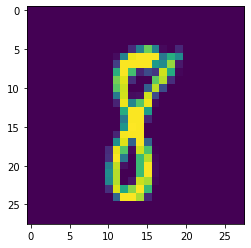

In [26]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [30]:
print(torch.argmax(net(X[0].view(-1,28*28))[0]))

tensor(8)


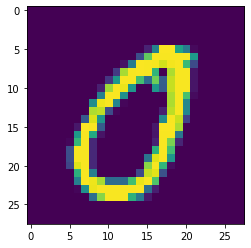

In [35]:
plt.imshow(X[2].view(28,28))
plt.show()

In [36]:
print(torch.argmax(net(X[2].view(-1,28*28))[0]))

tensor(0)
